<a href="https://colab.research.google.com/github/leilaneanjos/Analise_de_Sistemas_Lineares/blob/main/ASL4_An%C3%A1lise_de_Sinais_no_Tempo_Cont%C3%ADnuo_A_S%C3%A9rie_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Sistemas Lineares**

# 4 - Análise de Sinais no Tempo Contínuo: A Série de Fourier 

A partir do estudo de *Análise de Sinais no Tempo Contínuo: A Série de Fourier*, foi apresentado que um sinal periódico pode ser representado como a soma de senoides (ou  exponenciais, para a sua forma compacta) de várias frequências, para isso se fez uso da Série de Fourier. Neste notebook veremos como se aplica um sinal periódico utilizando a série de Fourier na Linguagem Python. 


# **Biblioteca:**

Para desenvolvermos os códigos iremos utilizar como base a biblioteca `sympy`, sendo ela uma biblioteca para matemática simbólica, `numpy`, uma biblioteca numérica e o `matplotlib.pyplot`, sendo ela uma biblioteca para a plotagem de gráficos.

# 4.1 - Representação de sinais periódicos pela série trigonométrica de Fourier
 Sabemos que um sinal periódico irá apresentar uma repetição de sua amplitude a intervalos de tempo iguais. Para um sinal $x(t)$ com um período $T_0$, pode ser representado por:
 $$x(t)= x(t - T_0)$$ 

 Por definição  sabemos que para ser periódico o sinal deve começar em $t=-\infty$ e continuar até $t=\infty$. Devido a sua periodicidade a área do sinal $x(t)$ para qualquer  intervalo de duração $T_0$ é a mesma, ou seja, idependentimente do valor real de $t$ a área será a mesma, deste modo podemos representar a área sobre $x(t)$ para qualquer intervalo de duração $T_0$ como sendo:

 $$(\int_{a}^{a+T_0}x(t) dt = \int_{b}^{b+T_0}x(t) dt) = \int_{T_0}x(t) dt$$

 onde $a$ e $b$ são numeros reais.

  


# **Exemplo 1:**
Determine a série Trigonométrica compacta de Fourier do sinal periódico $x(t)$ mostrado na figura abaixo.Trace o espectro de amplitude e fase de x(t).
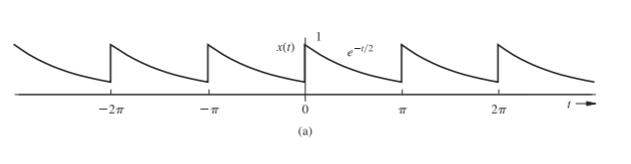

Se a forma compacta da série de Fourier é expressa por:

$$ x(t)= C_0 + \Sigma C_n cos (n\omega_0t+\theta_n)$$

Onde:
- $C_0$ = $a_0$;
- $C_n$ = $\sqrt[]{a_n^2+b_n^2}$
- $\theta_0$ = $tan^{-1}(\frac{-b_n}{a_n})$ 

Como:
- $a_0$ = $\frac{1}{T_0} \int_{T_0} x(t)$ $dt$
- $a_n$ = $\frac{2}{T_0} \int_{T_0} x(t)$ $cos(n\omega_0t)$ $dt$
- $b_n$ = $\frac{2}{T_0} \int_{T_0} x(t)$ $sen(n\omega_0t)$ $dt$

Para realizarmos o que se pede no exemplo, a partir da linguagem python, precisaremos:

- Importa a biblioteca `sympy`, `numpy` e a `matplotlib.pyplot`;
- Definir a variável $t$ e a constante $n$ a partir da função `sp.symbols(' ')`;
- Definir o sinal periódico $x(t)$;
- Definir $T_0$ e $\omega_0$;
- Definir $a_0$, $a_n$, $b_n$, $C_n$ e $\theta_0$ a partir de funções dadas pelas blibliotecas `sympy` e `numpy`.



- Aplicar a sériede Fourier através da função `sp.fourier_series()`.



- Importando as blibliotecas

In [1]:
import sympy as sp
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

- Definindo a variável $t$ e a constante $n$ :

In [2]:
t = sp.symbols('t', real=True)
n = sp.symbols('n', constant=True)

- Definindo o sinal periódico $x(t)$: 

In [3]:
x = sp.exp(-t/2)
x

exp(-t/2)

como o sinal periódico se trata de uma exponencial, utiliza-se a função `sp.exp()`, sendo está função a representação da exponencial dada pela biblioteca `sympy`.

- Definindo $T_0$ e $\omega_0$:

In [4]:
T0= sp.pi
w0 = 2

- Definindo $a_0$:

In [5]:
a0= (1/T0)*sp.integrate(x, (t, 0, T0))
a0

(2 - 2*exp(-pi/2))/pi

`sp.integrate` é uma função da biblioteca `sympy` que realiza integrais. Para uma melhor visualização da resposta podemos fazer uso da função `.eval()`, onde através dela podemos passar uma precisão de números que se deseja trabalhar ( vizualizar). 
 

In [6]:
a0 = a0.evalf(3)
a0

0.504

- Definindo $a_n$:

In [7]:
an = (2/T0)*sp.integrate(x*(sp.cos(n*w0*t)), (t, 0, T0))
an

2*(8*n*sin(2*pi*n)/(16*n**2*exp(pi/2) + exp(pi/2)) - 2*cos(2*pi*n)/(16*n**2*exp(pi/2) + exp(pi/2)) + 2/(16*n**2 + 1))/pi

O resultado que nos é retornado é apenas um simbolo visto do ponto de vista do python, mas como queremos interpretalo como uma equação que pode nos oferecer $a_n$ resultados a partir de n valores, utilizamos a função do `sympy` chamada `lambda` onde ela faz com que $a_n$ se torne uma função que dependa de $n$. 

In [8]:
an = lambda n: (2/T0)*sp.integrate(x*(sp.cos(w0*n*t)), (t, 0, T0))
an(1).evalf(3)

0.0593

- Definindo $b_n$:

In [9]:
bn = (2/sp.pi)*sp.integrate(x*(sp.sin(w0*n*t)), (t, 0, sp.pi))
bn

2*(-8*n*cos(2*pi*n)/(16*n**2*exp(pi/2) + exp(pi/2)) + 8*n/(16*n**2 + 1) - 2*sin(2*pi*n)/(16*n**2*exp(pi/2) + exp(pi/2)))/pi

In [10]:
bn = lambda n:(2/sp.pi)*sp.integrate(x*(sp.sin(2*n*t)), (t, 0, sp.pi))
bn(1).evalf(3)

0.237

- Definindo $C_n$:

In [11]:
Cn = lambda n: ((an(n)**2 + bn(n)**2))**(1/2)
Cn(1).evalf(4)


0.2446

Definindo $\theta_n$:

In [12]:
fase_n = lambda n: sp.atan(-bn(n)/an(n))*(180/sp.pi)
fase_n(1).evalf(4)

-75.96

Ao cálcular a fase utilizamos a função `sp.atan`, sendo ela responsavél por cálcular o arco tangente de uma função.
Como o sympy retorna o valor do arco tangente em radianos multiplicamos a expressão por $\frac{180}{\pi}$

Conseguimos realizar tudo o que foi proposto para a obtenção do que se pede no exemplo 1, mas para encontrarmos a série compacta de fourier e para  plotarmos o gráfico do espectro de amplitude e o de fase, é necessario n valores, para isso faremos uso de uma laço de repetição. 

- Laço de repetição para $C_n$

Para o laço de repitição teremos:
- `N` que é responsavél pelo tamanho do nosso array;
- `n` um array de `N` elementos;
- `C` um array que irá guarda `N` elementos mas devido a ele ser do tipo `np.zeros` ele irá guarda `N` zeros;

O comando `for` irá repetir 10 vezes a operação $C_n$ o responsável por essa ação será o `np.arange` onde ele irá ler a quantidade de termos no array `n` a partir da função `len()` e a cada laço ele implementa o valor da posição desse array. Quando a útima posição for implementada no `for` o laço de repetição se encerra e a operação realizada dentro do `for` será guardada nos array $C$.
O mesmo processo irá se repetir quando fizermos um laço de repetição para a fase$(\theta_0)$.

In [13]:
N = 10
n = np.arange(N)
C = np.zeros(N)
for i in np.arange(len(n)):
  C[i]= Cn(n[i])

In [14]:
C.round(3)

array([1.009, 0.245, 0.125, 0.084, 0.063, 0.05 , 0.042, 0.036, 0.032,
       0.028])

<StemContainer object of 3 artists>

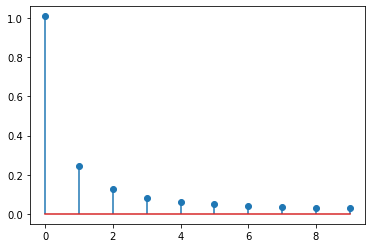

In [15]:
plt.stem(C,use_line_collection=True)

- Laço de repetição para $\theta_n$

In [16]:
N = 10
n = np.arange(N)
fase = np.zeros(N)
for i in np.arange(0, len(n)):
  fase[i] = fase_n(n[i])

In [17]:
fase.round(3)

array([  0.   , -75.964, -82.875, -85.236, -86.424, -87.138, -87.614,
       -87.955, -88.21 , -88.409])

<StemContainer object of 3 artists>

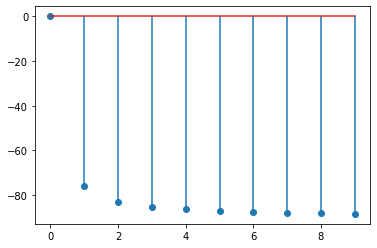

In [18]:
plt.stem(fase,use_line_collection=True)

Já temos os aspectros de amplitude e de fase basta agora a equação compacta da serie de fourier

In [19]:
N = 10
n = np.arange(N)
x_t = a0
for i in np.arange(0, len(n)):
  x_t += C[i]*sp.cos(i * w0 *t + fase[i])

In [20]:
x_t.evalf(3)

0.245*cos(2*t - 75.9637565320735) + 0.125*cos(4*t - 82.8749836510982) + 0.0838*cos(6*t - 85.2363583092738) + 0.0629*cos(8*t - 86.4236656250027) + 0.0504*cos(10*t - 87.1375947738883) + 0.042*cos(12*t - 87.6140559696112) + 0.036*cos(14*t - 87.9545915111128) + 0.0315*cos(16*t - 88.2100893917539) + 0.028*cos(18*t - 88.4088597288054) + 1.51

# **Série exponencial de Fourier:**

A série exponencial de Fourier pode ser expressa por:

$$ x(t) = \Sigma D_ne^{jn\omega_0t}$$
Onde $D_n$ é expresso por:

$$ D_n = \frac{1}{T_0}\int_{T_0} x(t) e^{-jn\omega_0t} dt$$

# **Exemplo 2:**

Determine a série exponencial de Fourier do sinal da figura do exemplo 1:

Primeiramente definimos a função $D_n$ como uma função que dependa de n, como feito no exemplo anterior ao definirmos $a_n$, $b_n$ e $C_n$.

In [21]:
j = I
Dn = lambda n: (1/T0)*sp.integrate(x*(sp.exp(-j*n*w0*t)), (t, 0, T0))

Para analisarmos $D_n$ como uma equação para n valores utilizamos um laço de repetição. A mesma idéia para o laço de repetição do $C_n$ para o exemplo 1 irá ser aplicado aqui mas teremos que nos atentar aos seguintes detalhes:

- 1º: como por definição teremos valores complexos precisamos redefinir o array para poder receber valores complexos para isso utilizamos `astype(complex)`.
- 2º para cada $n$ valor é retornado 2 termos da equação, exceto quando n=0, para esse caso nos é retornado o valor médio do sinal
 
 Devido a isso a quantidade de componentes do array `D` será de 21 termos por isso que `np.zeros(2*N+1)`.
 `n` é um array que guarda valores que começão em `-N` e terminam em `N+1`;

In [22]:
N =10
D = np.zeros(2*N+1).astype(complex)
n = np.arange(-N, N+1)
for k in np.arange(0, len(n)):
  D[k] = Dn(n[k])

Denifindo a magnitude e fase:

`np.abs` é uma função que cálcula o valor absoluto , sendo que o valor absoluto de um número é cálculado tirando a raiz quadrada da soma dos quadrados de suas componentes,ou seja, a magnitude (módulo). já para clacular o angulo utilizasse
`np.angle`, como esta função retorna o valor em radianos faz-se uso do argumento `deg=True` para que seja retornado resultados em graus. 

In [23]:
magDn = np.abs(D)
faseDn= np.angle(D, deg=True)

Text(0.5, 1.0, 'Espectro de Fase de x(t)')

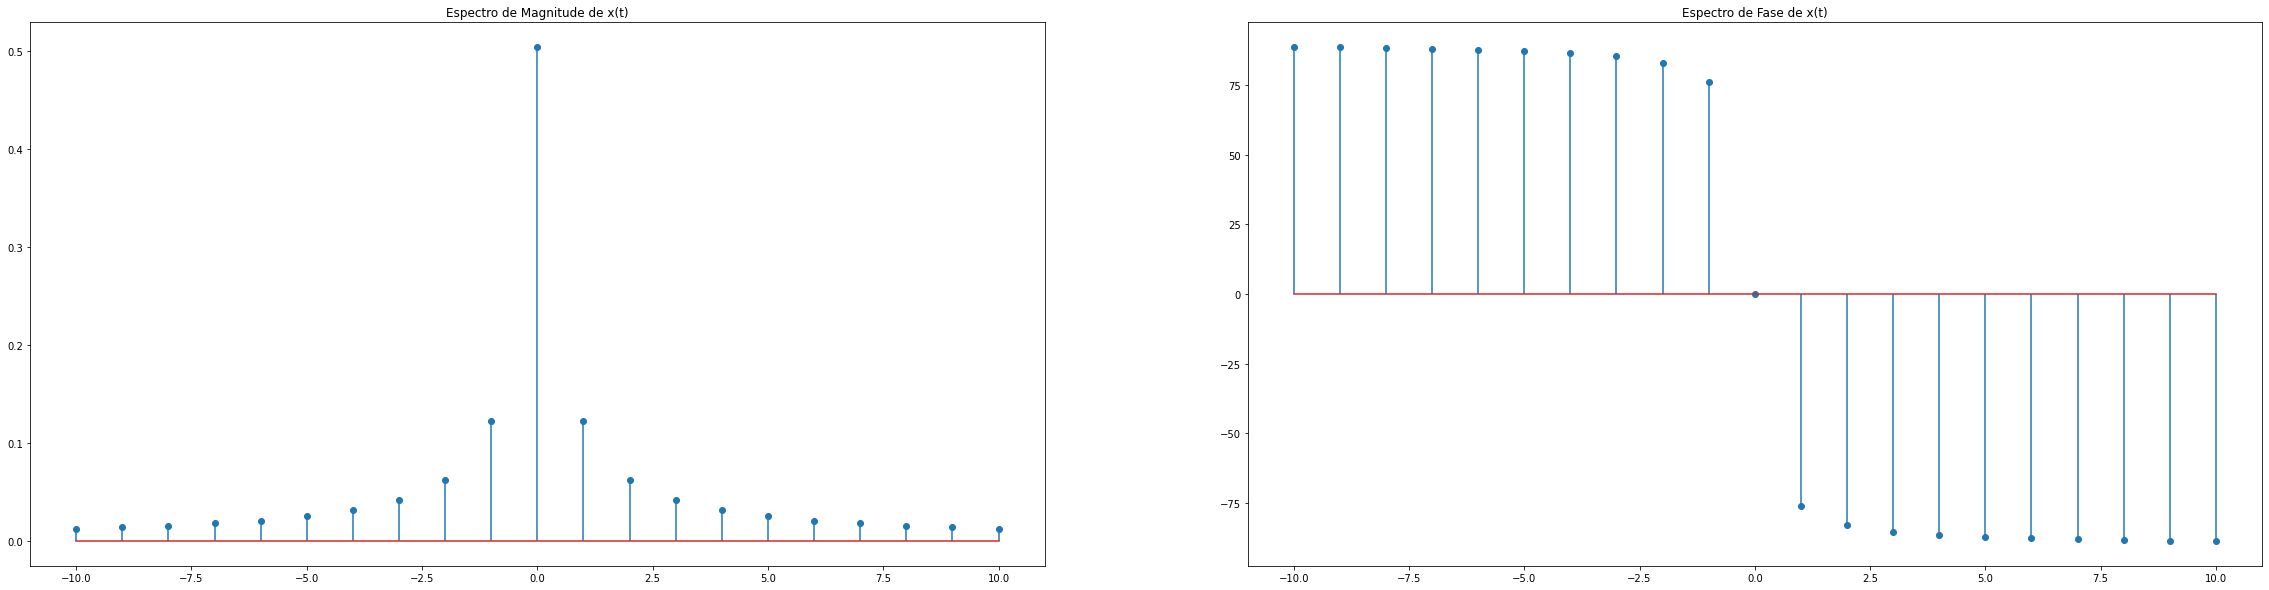

In [24]:
plt.figure(figsize = (40, 10))
plt.subplot(121)
plt.stem(n, magDn, use_line_collection=True)
plt.title('Espectro de Magnitude de x(t)')
plt.subplot(122)
plt.stem(n,faseDn, use_line_collection=True)
plt.title('Espectro de Fase de x(t)')

Descrevedo cada função do matiplot.plypot utilizada:

- `plt.figure()` = ela é usada quando queremos alterar as propriedades da figura, no caso queremos ajustar o tamanho da figura para isso dentro de seu argumento utilizasse o subcomando `figsize()` 
- `plt.subplot` = serve para plotar mais de um grafico em uma única figura normalmente em seu argumento os valores são separados por virgula onde`plt.subplot( numero de linhas (nrows), numero de colunas(ncols), o numero do gráfico(plot_number))`
logo nó primeiro subplot temos: (nrows = 1, ncols = 2, plot_number=1). Já no segundo plot temos:  (nrows = 1, ncols = 2, plot_number=2)
- `plt.stem()` = plota um tipo especifico de grafico no caso. chamado de gráfico de haste. Onde ele traça linhas vesticais em cada local x da linha base até y e coloca um marcardor lá.